# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

c320c337e93103ed48866b03df51562d


### Generate the Cities List by Using the `citipy` Library

In [162]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [163]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]['lat']
        city_lng = weather_json["coord"]['lon']
        city_max_temp = weather_json["main"]['temp_max']
        city_humidity = weather_json["main"]['humidity']
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]['speed']
        city_country = weather_json["sys"]['country']
        city_date = weather_json["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | revda
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | yeniseysk
Processing Record 5 of Set 1 | puerto aysen
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | spratzern
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | tarinkot
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | la libertad
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | ferkessedougou
Processing Record 18 of Set 1 | biltine
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 

Processing Record 41 of Set 4 | enewetak
Processing Record 42 of Set 4 | san andres
Processing Record 43 of Set 4 | ola
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | ba
City not found. Skipping...
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | gilmer
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | kone
Processing Record 0 of Set 5 | wailua homesteads
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | hayma'
City not found. Skipping...
Processing Record 3 of Set 5 | plastun
Processing Record 4 of Set 5 | kattivakkam
Processing Record 5 of Set 5 | villanueva
Processing Record 6 of Set 5 | mata-utu
Processing Record 7 of Set 5 | taroa
Processing Record 8 of Set 5 | pangody
Processing Record 9 of Set 5 | gilgit
Processing Record 10 of Set 5 | jurm
Processing Record 11 of Set 5 | benjamin constant
Processing Record 12 of Set 5 | artemovskiy
Processing Record 13 of Set 5 | viedma
Processing Re

City not found. Skipping...
Processing Record 36 of Set 8 | kerikeri
Processing Record 37 of Set 8 | najran
Processing Record 38 of Set 8 | holualoa
Processing Record 39 of Set 8 | el alto
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | pea ridge
Processing Record 42 of Set 8 | harpanahalli
Processing Record 43 of Set 8 | tash-kumyr
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | palu
Processing Record 46 of Set 8 | harran
Processing Record 47 of Set 8 | toga village
City not found. Skipping...
Processing Record 48 of Set 8 | fomboni
Processing Record 49 of Set 8 | hasaki
Processing Record 0 of Set 9 | boende
Processing Record 1 of Set 9 | sai buri
Processing Record 2 of Set 9 | ostersund
Processing Record 3 of Set 9 | penzance
Processing Record 4 of Set 9 | acarau
Processing Record 5 of Set 9 | karratha
Processing Record 6 of Set 9 | nuevo imperial
Processing Record 7 of Set 9 | at taj
Processing Record 8 of 

Processing Record 27 of Set 12 | leh
Processing Record 28 of Set 12 | tamanrasset
Processing Record 29 of Set 12 | fraga
Processing Record 30 of Set 12 | puerto baquerizo moreno
Processing Record 31 of Set 12 | aswan
Processing Record 32 of Set 12 | radyvyliv
Processing Record 33 of Set 12 | tabarka
Processing Record 34 of Set 12 | qusmuryn
Processing Record 35 of Set 12 | khash
Processing Record 36 of Set 12 | vila velha
Processing Record 37 of Set 12 | freeport
Processing Record 38 of Set 12 | baganga
Processing Record 39 of Set 12 | galesong
Processing Record 40 of Set 12 | albufeira
Processing Record 41 of Set 12 | berdigestyakh
Processing Record 42 of Set 12 | hailey
Processing Record 43 of Set 12 | danville
Processing Record 44 of Set 12 | lampang
Processing Record 45 of Set 12 | taksimo
Processing Record 46 of Set 12 | calvi
Processing Record 47 of Set 12 | blair
Processing Record 48 of Set 12 | arawa
-----------------------------
Data Retrieval Complete      
------------------

In [164]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [165]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,revda,56.8010,59.9303,1.65,97,100,3.89,RU,1699505208
1,richards bay,-28.7830,32.0377,19.48,79,100,0.77,ZA,1699505162
2,yeniseysk,58.4497,92.1703,-8.39,70,7,3.96,RU,1699505208
3,puerto aysen,-45.4000,-72.7000,6.10,98,92,1.65,CL,1699505208
4,gadzhiyevo,69.2551,33.3362,-8.76,98,86,2.47,RU,1699505208


In [166]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [167]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,revda,56.8010,59.9303,1.65,97,100,3.89,RU,1699505208
1,richards bay,-28.7830,32.0377,19.48,79,100,0.77,ZA,1699505162
2,yeniseysk,58.4497,92.1703,-8.39,70,7,3.96,RU,1699505208
3,puerto aysen,-45.4000,-72.7000,6.10,98,92,1.65,CL,1699505208
4,gadzhiyevo,69.2551,33.3362,-8.76,98,86,2.47,RU,1699505208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

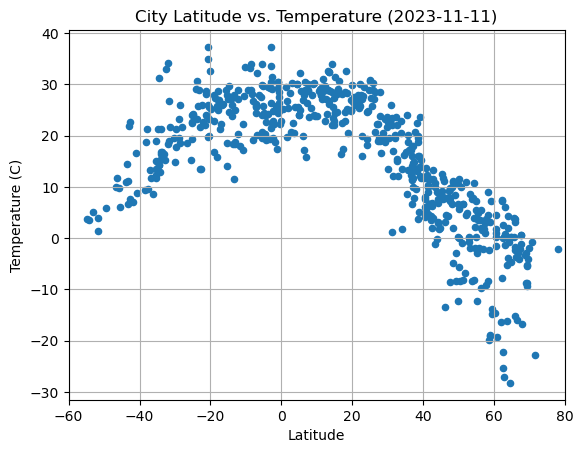

In [168]:
# Build scatter plot for latitude vs. temperature
plot1 = city_data_df.plot.scatter(x='Lat',
                                  y='Max Temp',
                                  xlim=(-60,80),
                                  grid=True
                                 )

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

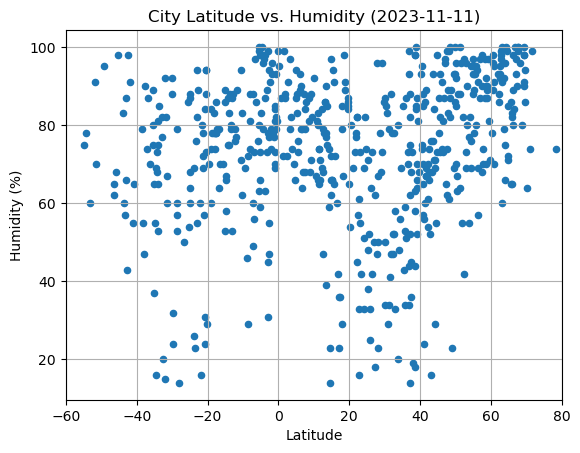

In [169]:
# Build the scatter plots for latitude vs. humidity
plot2 = city_data_df.plot.scatter(x='Lat',
                                  y='Humidity',
                                  xlim=(-60,80),
                                  grid=True
                                 )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

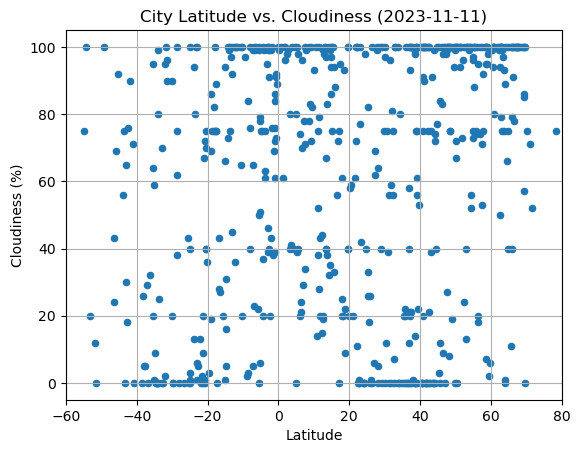

In [170]:
# Build the scatter plots for latitude vs. cloudiness
plot3 = city_data_df.plot.scatter(x='Lat',
                                  y='Cloudiness',
                                  xlim=(-60,80),
                                  grid=True
                                 )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

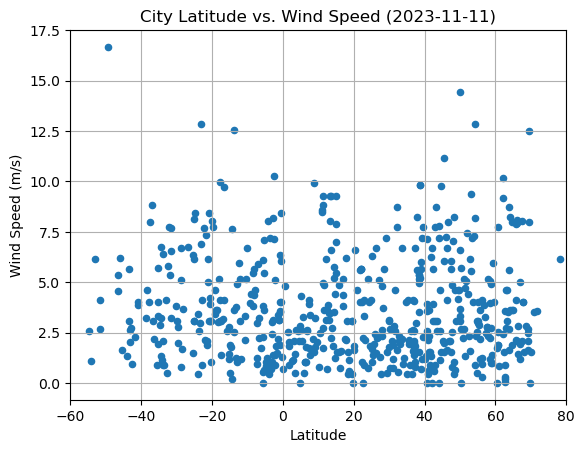

In [171]:
# Build the scatter plots for latitude vs. wind speed
plot4 = city_data_df.plot.scatter(x='Lat',
                                  y='Wind Speed',
                                  xlim=(-60,80),
                                  grid=True
                                 )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [172]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    print(f"The linear regression fit is y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    plt.show()  

In [173]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,revda,56.8010,59.9303,1.65,97,100,3.89,RU,1699505208
2,yeniseysk,58.4497,92.1703,-8.39,70,7,3.96,RU,1699505208
4,gadzhiyevo,69.2551,33.3362,-8.76,98,86,2.47,RU,1699505208
5,spratzern,48.1704,15.6184,6.57,99,8,0.45,AT,1699505208
8,tarinkot,32.6268,65.8733,15.36,52,7,0.56,AF,1699505209


In [174]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,richards bay,-28.7830,32.0377,19.48,79,100,0.77,ZA,1699505162
3,puerto aysen,-45.4000,-72.7000,6.10,98,92,1.65,CL,1699505208
6,port-aux-francais,-49.3500,70.2167,5.93,95,100,16.68,TF,1699505209
7,grytviken,-54.2811,-36.5092,3.56,78,100,1.08,GS,1699505209
10,adamstown,-25.0660,-130.1015,22.56,87,100,8.16,PN,1699505209


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7600766135358822
The linear regression fit is y = -0.6x + 34.64


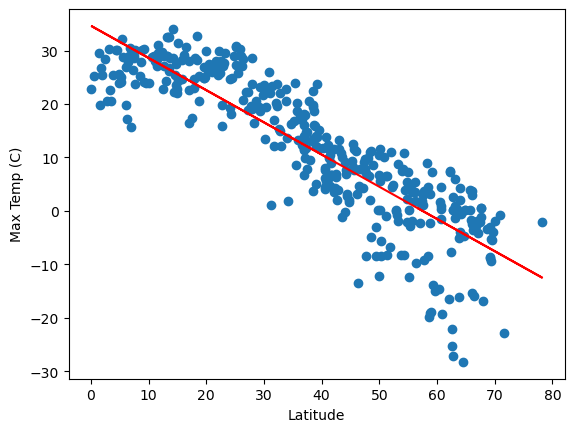

In [175]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp (C)')

The r-squared is: 0.43767599864156287
The linear regression fit is y = 0.34x + 28.58


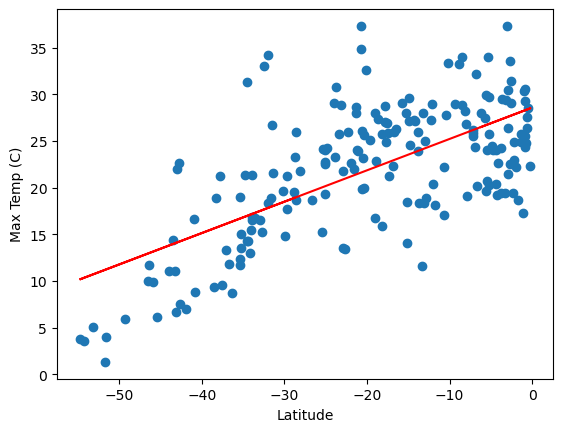

In [177]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp (C)')

**Discussion about the linear relationship:** Overall there is a very strong correlation for both the northern and southern hemisphere where the closer you are to the equator, the warmer the max temp will be. This holds true for both, with the northern hemisphere having a slightly better linear fit (higher r^2 value).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06999393837177488
The linear regression fit is y = 0.27x + 64.06


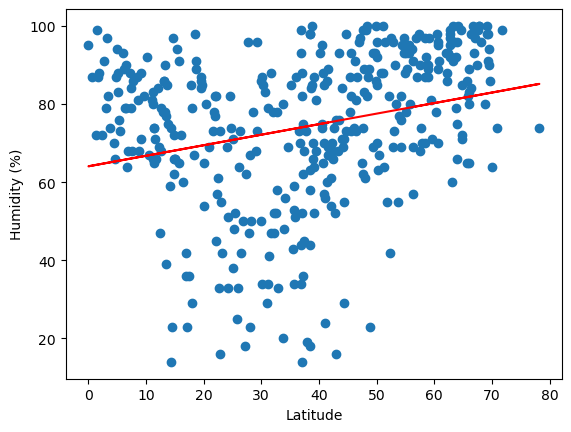

In [178]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity (%)')

The r-squared is: 0.039123051619939786
The linear regression fit is y = 0.27x + 77.29


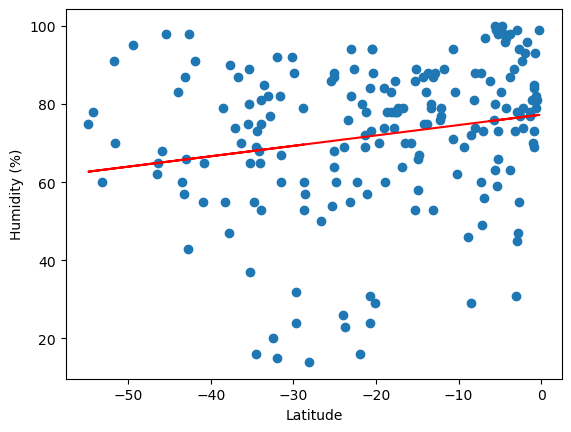

In [179]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity (%)')

**Discussion about the linear relationship:** These plots are modeling humidity as a function of latitude. There is no real model for this data, indicating that there is no relationship between the two. This is unsurprising as local geography/weather patterns are a bigger influence than latitude for humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0300087689657595
The linear regression fit is y = 0.34x + 51.4


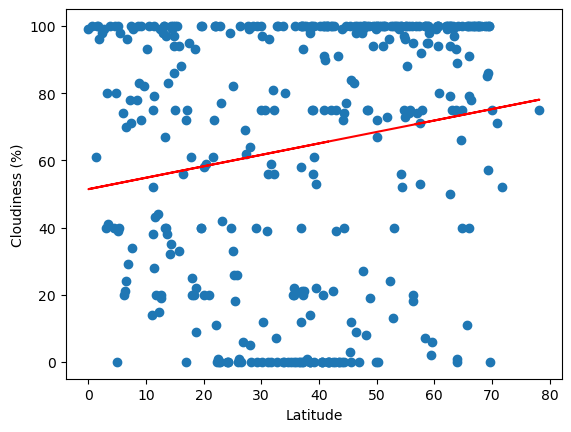

In [180]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

The r-squared is: 0.0987166322643427
The linear regression fit is y = 0.83x + 69.9


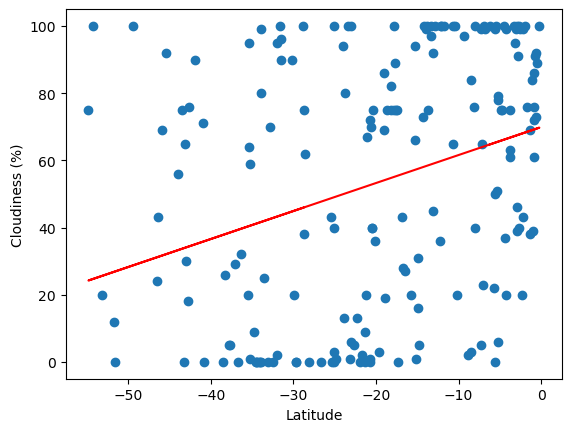

In [181]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)')

**Discussion about the linear relationship:** These plots are modeling cloudiness % as a function of latitude. There is no real model for this data (r^2 is very low indicating a poor fit), indicating that there is no relationship between the two. This is unsurprising as local geography/weather patterns are a bigger influence than latitude for cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.010502615205922095
The linear regression fit is y = 0.01x + 3.0


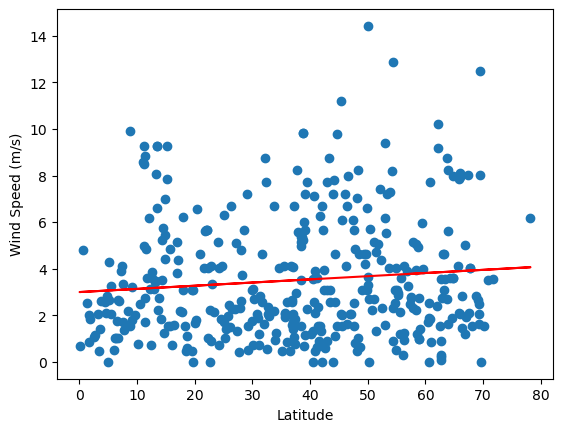

In [182]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

The r-squared is: 0.00890829751758249
The linear regression fit is y = -0.02x + 3.47


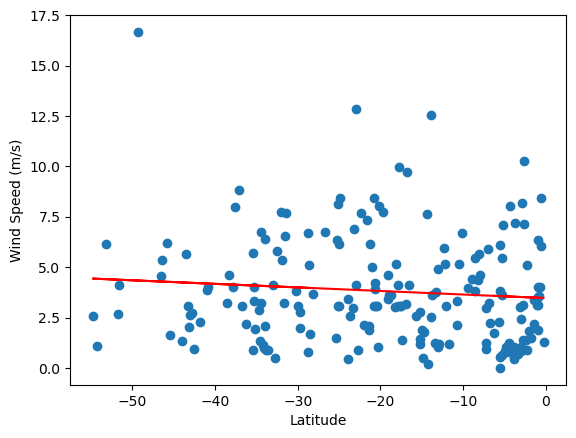

In [183]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed (m/s)')

**Discussion about the linear relationship:** These plots are modeling cloudiness % as a function of latitude. Again, there is no real model for this data (r^2 is very low indicating a poor fit), indicating that there is no relationship between the two. This is unsurprising as local geography/weather patterns are a bigger influence than latitude for wind speed. 